# Model Comparison
Compare the results of the time series prediction models for different periodicities (daily, weekly, 4-weeks), with visualizations that group the models together and display the comparison using metrics like RMSE and other chosen metrics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the directory where your result files are stored
results_directory = '/content/drive/MyDrive/PHB009/dataset/model/results/MULTI'

## Testing RMSE grouped by Periodicity (Daily, Weekly, 4Weekly)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import MAE

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Function to calculate MAE
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Function to load and analyze results for a specific periodicity
def analyze_periodicity_results(file_path, periodicity):
    # List all CSV files in the directory
    files = os.listdir(file_path)

    # Filter files based on periodicity and file extension (.csv)
    files = [file for file in files if periodicity in file and file.endswith('.csv')]

    # Initialize a DataFrame to store the comparison metrics
    comparison_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])  # Add 'MAE' column

    # Loop through the files and calculate RMSE and MAE for each model
    for file in files:
        model_name = file.split('.')[0]  # Extract the model name
        df = pd.read_csv(os.path.join(file_path, file))
        rmse = round(calculate_rmse(df['Price'], df['Prediction']), 2)
        mae = round(calculate_mae(df['Price'], df['Prediction']), 2)  # Calculate MAE
        comparison_df.loc[len(comparison_df)] = [model_name, rmse, mae]  # Add MAE to the DataFrame

    # Sort the DataFrame by RMSE in ascending order (better to worse)
    comparison_df = comparison_df.sort_values(by='RMSE')

    return comparison_df

# Analyze results for daily models
daily_comparison_df = analyze_periodicity_results(results_directory, '1D')

# Analyze results for weekly models
weekly_comparison_df = analyze_periodicity_results(results_directory, '1W')

# Analyze results for monthly models
monthly_comparison_df = analyze_periodicity_results(results_directory, '4W')

# Display tables
print('Daily Models Comparison:')
print(daily_comparison_df)

print('\nWeekly Models Comparison:')
print(weekly_comparison_df)

print('\nMonthly Models Comparison:')
print(monthly_comparison_df)

Daily Models Comparison:
               Model   RMSE    MAE
2  1DFTAILSTMResults  48.58  41.81
0    1DAILSTMResults  50.12  42.74
1      1DLSTMResults  50.76  43.68

Weekly Models Comparison:
               Model   RMSE    MAE
2  1WFTAILSTMResults  34.13  27.35
1    1WAILSTMResults  35.36  27.69
0      1WLSTMResults  37.07  28.02

Monthly Models Comparison:
               Model   RMSE    MAE
2  4WFTAILSTMResults  23.96  22.03
1    4WAILSTMResults  24.44  21.61
0      4WLSTMResults  24.54  23.14


## Graphs grouped by Periodicity (Daily, Weekly, 4Weekly)

In [ ]:
import os
import pandas as pd

# Function to load and prepare results for a specific periodicity
def prepare_periodicity_results(file_path, periodicity):
    # List all CSV files in the directory
    files = os.listdir(file_path)

    # Filter files based on periodicity and file extension (.csv)
    files = [file for file in files if periodicity in file and file.endswith('.csv')]

    # Initialize a DataFrame to store the combined data with Date and Price
    combined_df = None

    # Loop through the files and load predictions into the combined DataFrame
    for file in files:
        model_name = file.split('.')[0]  # Extract the model name
        df = pd.read_csv(os.path.join(file_path, file))

        # Use the 'Date' column as the index
        df.set_index('Date', inplace=True)

        # Ensure the index is in datetime format
        df.index = pd.to_datetime(df.index)

        # Rename the 'Prediction' column to the model name
        df.rename(columns={'Prediction': model_name}, inplace=True)

        # Combine the DataFrame with the combined_df
        if combined_df is None:
            combined_df = df[['Price', model_name]]
        else:
            combined_df = combined_df.join(df[[model_name]])

    return combined_df

# Prepare results for daily models
daily_combined_df = prepare_periodicity_results(results_directory, '1D')

# Prepare results for weekly models
weekly_combined_df = prepare_periodicity_results(results_directory, '1W')

# Prepare results for monthly models
monthly_combined_df = prepare_periodicity_results(results_directory, '4W')

# Display the combined DataFrames
print('Combined Daily Models:')
print(daily_combined_df.head())

print('\nCombined Weekly Models:')
print(weekly_combined_df.head())

print('\nCombined Monthly Models:')
print(monthly_combined_df.head())

Combined Daily Models:
                 Price  1DAILSTMResults  1DLSTMResults  1DFTAILSTMResults
Date                                                                     
2023-01-01    6.034583        61.973368      54.253737          68.630881
2023-01-02  105.573333        73.260002      65.417894          78.827288
2023-01-03  137.238333        76.742152      71.346593          82.005028
2023-01-04  115.684167        79.314893      75.271491          82.328224
2023-01-05  107.924583        78.268682      77.135988          82.017244

Combined Weekly Models:
                Price  1WLSTMResults  1WAILSTMResults  1WFTAILSTMResults
Date                                                                    
2023-01-02  41.687024     105.795909       101.601647          99.604404
2023-01-09  83.621190      92.058673        86.226999          92.287692
2023-01-16  66.705000      82.599193        77.960312          88.658120
2023-01-23  45.464940      76.667054        73.084807          85.562

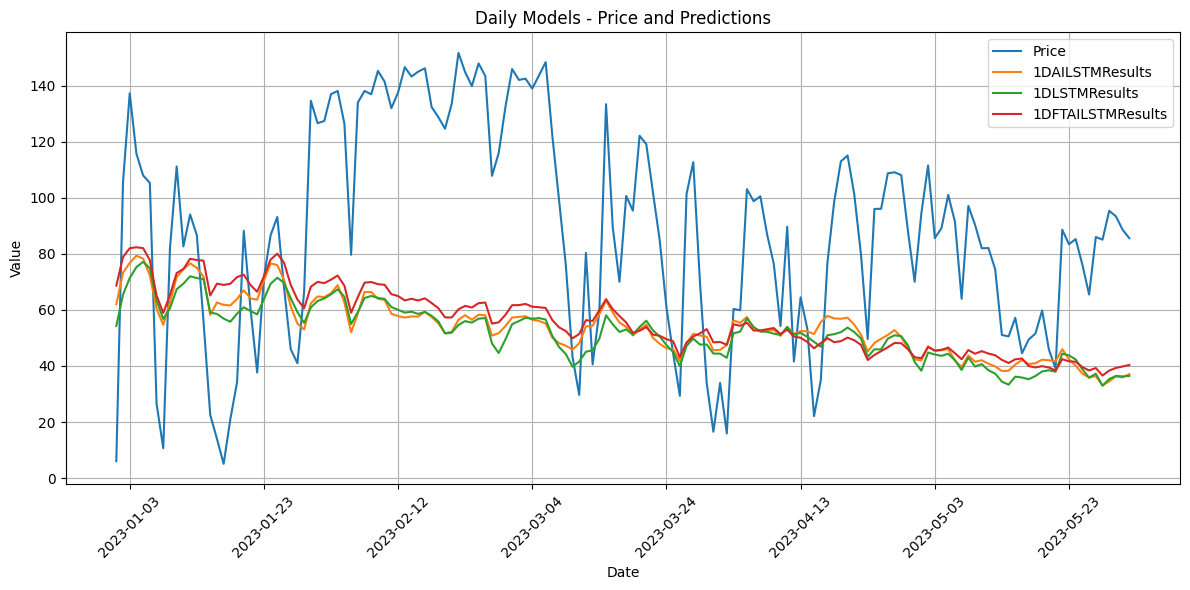

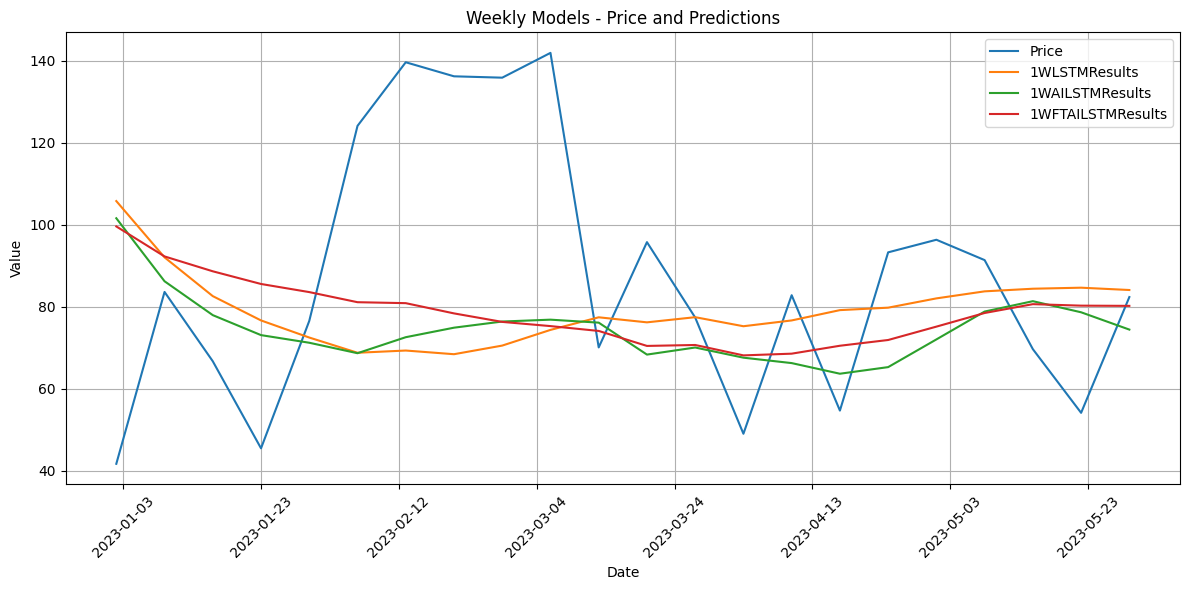

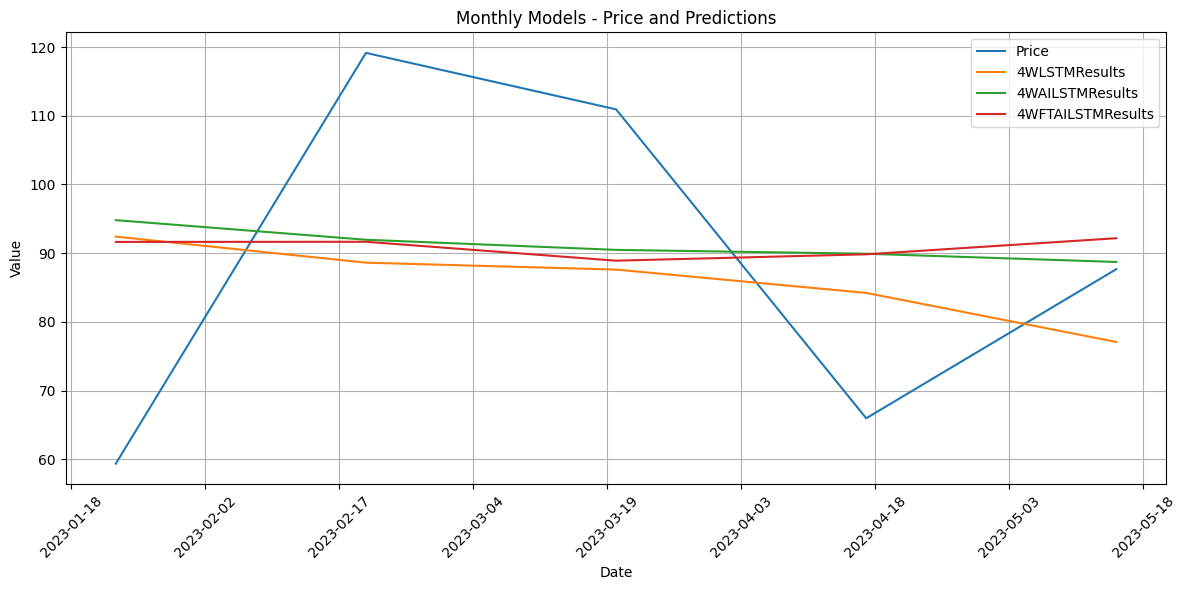

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Function to plot time series data with custom x-axis ticks
def plot_time_series(data_df, title):

    fig, ax = plt.subplots(figsize=(12, 6))

    # Set custom ticks and labels for x-axis
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))  # Adjust the number of ticks as needed
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format date as desired

    for column in data_df.columns:
        plt.plot(data_df.index, data_df[column], label=column)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Plot the combined DataFrames separately with custom x-axis ticks
plot_time_series(daily_combined_df, 'Daily Models - Price and Predictions')
plot_time_series(weekly_combined_df, 'Weekly Models - Price and Predictions')
plot_time_series(monthly_combined_df, 'Monthly Models - Price and Predictions')